tensor -> (detach) ->
tensor -> F.to_pil_image ->
Pil Image -> np.asarray ->
numpy array

In [21]:
from typing import List
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as F

plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs: List[torch.Tensor]):
    """
    tensor list를 plt으로 한row로 그린다.
    """
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(10,10))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [22]:
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes

In [23]:
car = read_image('car.jpg')
print(type(car), car.dtype)

<class 'torch.Tensor'> torch.uint8


<class 'torch.Tensor'> torch.uint8


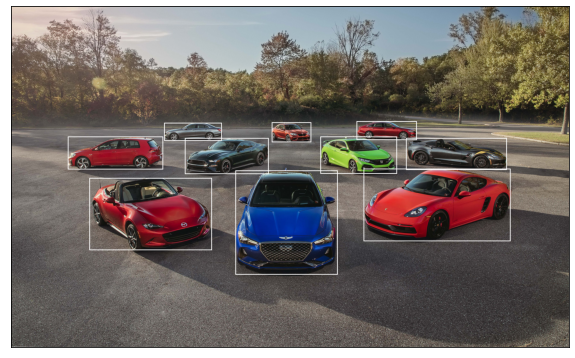

In [24]:
boxes = torch.tensor([
    [1635.5510,  733.9691, 1883.2721,  858.3848],
    [1090.2979,  831.0725, 1616.1503, 1057.9868],
    [2211.0547, 1023.2090, 3133.7617, 1477.3441],
    [1940.4222,  822.9277, 2421.6846, 1055.2271],
    [ 491.8738, 1081.4347, 1260.4280, 1533.7958],
    [ 356.6774,  822.3189,  954.5173, 1028.1844],
    [ 960.4736,  736.0134, 1322.7144,  849.2552],
    [1407.6622, 1034.3492, 2049.5898, 1686.9824],
    [2477.7917,  831.5595, 3110.5356, 1031.2653],
    [2167.1729,  726.0698, 2545.2468,  844.5479]
], dtype=torch.float)

result = draw_bounding_boxes(car, boxes, width=5)
print(type(result), result.dtype)
show(result)